# 1. Import necessary libs
# -----------------------------------

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plot
%matplotlib inline

# Seaborn
import seaborn as sns

# scipy
from scipy.stats import norm ,zscore
from scipy.spatial.distance import cdist, pdist
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# sklearn
from sklearn import cluster
from sklearn.cluster import KMeans,AgglomerativeClustering

from sklearn import metrics
from sklearn.metrics import silhouette_score, silhouette_samples

In [2]:
# Read the excel data
custDf = pd.read_excel("Credit Card Customer Data.xlsx")
custDf

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
...,...,...,...,...,...,...,...
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0


<p style="font-family: Arial; font-size:2.4em;color:red;"> Q1: Univariate/EDT/ Create Visualization </p>

# 2. EDA
# ----------
###  1. size of the data
###  2. Data type of the columns
###  3. Info of the data
###  4. Five point summary (mean,std etc)
###  5. Look for nulls, unique values, duplicates etc

In [3]:
custDf.shape


(660, 7)

In [4]:
custDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [5]:
custDf.dtypes


Sl_No                  int64
Customer Key           int64
Avg_Credit_Limit       int64
Total_Credit_Cards     int64
Total_visits_bank      int64
Total_visits_online    int64
Total_calls_made       int64
dtype: object

In [6]:
custDf.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


In [7]:
custDf.nunique()

Sl_No                  660
Customer Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [8]:
# Check for null values
custDf.isnull().sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [9]:
custDf.duplicated().sum()

0

In [10]:
custDf[custDf['Total_visits_bank'] < 0].sum()

Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

## 2.1 Univariate Analysis

### Count Plots

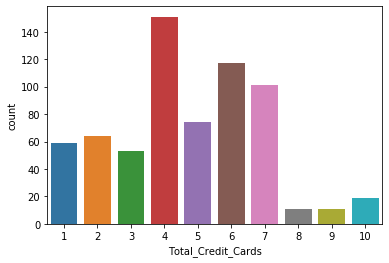

In [11]:
sns.countplot(x='Total_Credit_Cards',data=custDf)

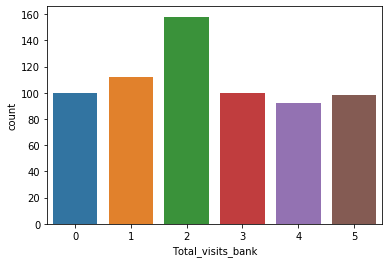

In [12]:
sns.countplot(x='Total_visits_bank',data=custDf)

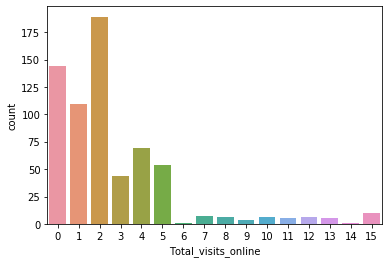

In [13]:
sns.countplot(x='Total_visits_online',data=custDf)

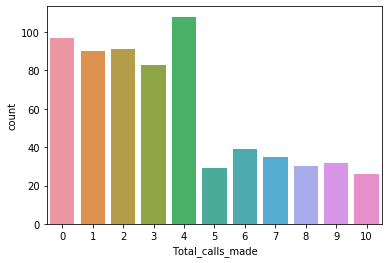

In [14]:
sns.countplot(x='Total_calls_made',data=custDf)

In [15]:
col_list = [ x for x in custDf.columns if (x != 'Sl_No' and x != 'Customer Key') ]
col_list

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

### Distribution Plots

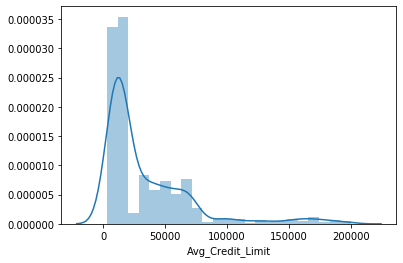

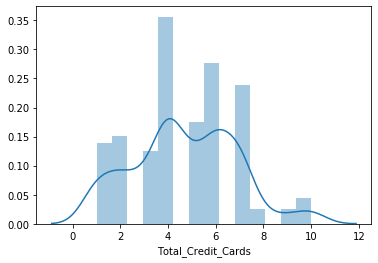

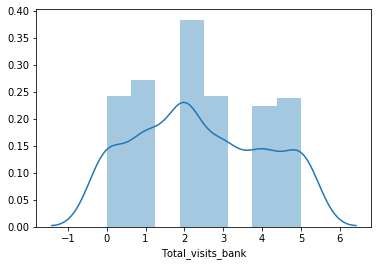

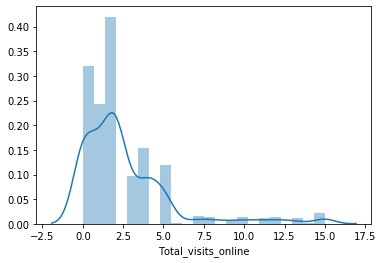

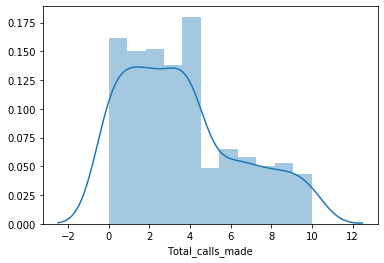

In [16]:
for col in col_list:
    sns.distplot(custDf[col], hist='False')
    plot.show()

<p style="font-family: Arial; font-size:2.4em;color:red;"> Q2: Insights from above graphs </p>

## -------------------------------------
## From the above Analysis:
## -------------------------------------

### 1. No null values found

### 2. No categorical variables found. All are integer variables

### 3. No duplicate rows found but there seems to be duplicate customer keys

### 4. No negative values found

### 5. Count plot shows 
#####             the number of people visit bank is equally distributed
#####             people prefere to do less online visits and calls.
#####             more number of people prefer to hold around 4-6 credit cards

### 6. Distribution plots shows multi modal behavior. There can be atleat 2-4 clusters.
####             Total visits online is right skewed. Again it shows people wants to do less online visits for their requests.
####             Total visits bank is distributed equally.
####             Average credit limit is right skewed which says there are less number of high income people. More number of people with                      less than 50000  as their credit limit.

# 3. Data Preparation
# ----------------------------

## 3.1 Remove duplicate Customer Keys

## 3.2 Drop columns which are not significant like serial number, customer keys etc

## 3.3 Scale the data

## 3.1 Removing duplicate Customer Keys
######  Take a copy of data, drop the serial number, check if dupicate customer key is found, sort the data by credit limit, keep the customer key with higher credit limit and drop others.

In [17]:
# Drop the Sl No column
custDf_Copy = custDf.drop('Sl_No', axis=1)

In [18]:
# There seems to be few customer key duplicates
custDf_Copy[custDf_Copy['Customer Key'].duplicated()]

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,47437,17000,7,3,1,0
398,96929,67000,6,2,2,2
432,37252,59000,6,2,1,2
541,50706,60000,7,5,2,2
632,97935,187000,7,1,7,0


In [19]:
#If duplicate customer key is found, keep the customer key with higher credit limit and drop the others
custDf_Copy.sort_values(by =['Avg_Credit_Limit'], inplace = True)
custDf_Copy.drop_duplicates(subset='Customer Key', keep='last',inplace = True)

## 3.3 Scaling

In [20]:
# Apply the zscore for scaling the data except the customer key
custDfSCaled = custDf_Copy.iloc[:, 1:]
custDfSCaled = custDfSCaled.apply(zscore)
custDfSCaled

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
9,-0.840590,-0.327230,-1.475392,-0.550400,1.199799
329,-0.787540,1.055582,0.983595,-0.210294,0.147297
46,-0.787540,-1.710043,-0.245899,-0.210294,0.498131
317,-0.787540,0.133707,1.598342,-0.890505,0.147297
312,-0.787540,1.055582,0.368848,-0.550400,0.147297
...,...,...,...,...,...
646,4.013549,1.055582,-1.475392,1.830338,-0.905206
632,4.040075,1.055582,-0.860646,1.490233,-1.256040
650,4.252277,2.438394,-0.860646,3.190759,-0.554372
631,4.252277,1.516519,-1.475392,4.211075,-1.256040


# 4. Bivariate Analysis
# -----------------------------

## 4.1 Pair plots

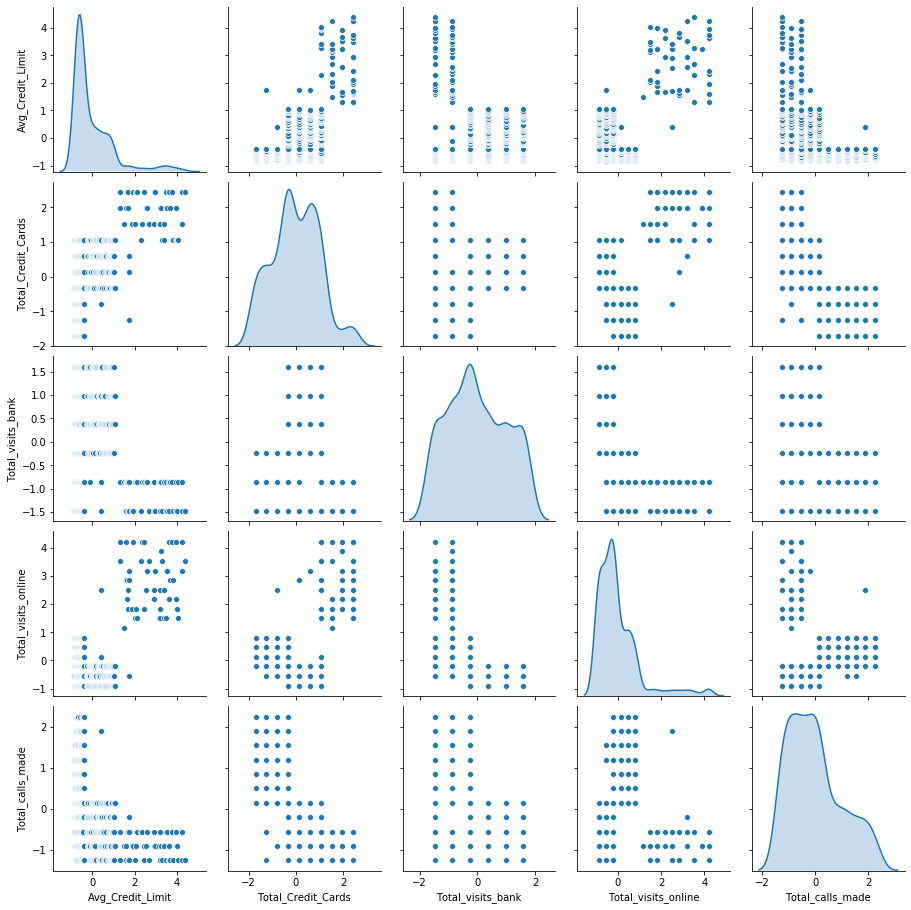

In [21]:
sns.pairplot(custDfSCaled, diag_kind='kde')
plot.show()

## Correlation Heatmap

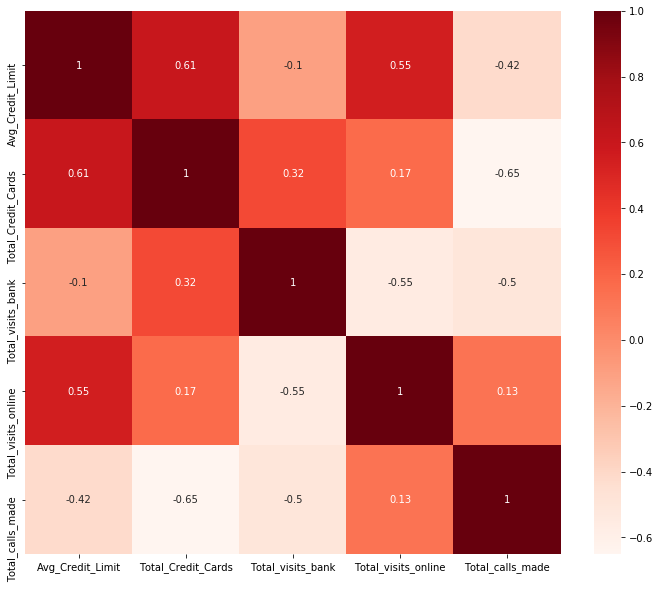

In [22]:
plot.figure(figsize=(12,10))
corr = custDfSCaled.corr()
sns.heatmap(corr, annot=True, cmap=plot.cm.Reds)
plot.show()

<p style="font-family: Arial; font-size:2.4em;color:red;"> Q2: Insights from above graphs </p>

## -------------------------------------
## From the above Analysis:
## -------------------------------------
### 1. Credit limit has high positive correlation with total number of credit cards. People having more number of credit cards have higher credit limit which is obvious.

### 2. Poeple having higher credilt limit does less calls and less bank visits.

### 3. Number of credit cards has higher negative relationship with calls.

### 4. People visiting the bank more often do less online visits and calls. They prefer to go bank rather than online and calls.

<p style="font-family: Arial; font-size:2.4em;color:red;"> Q3: Execution of K-Means Clustering </p>

# 5. Using K-Means clustering
# ----------------------------------------

## 5.1 Starting with Random number of clustering

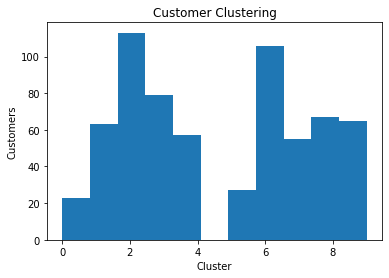

In [23]:
numClusters = 10

kMeanCluster = KMeans(n_clusters = numClusters, random_state=11)
cluster_labels = kMeanCluster.fit_predict(custDfSCaled)

plot.hist(cluster_labels, bins = (numClusters+1))
plot.title("Customer Clustering")
plot.xlabel("Cluster")
plot.ylabel("Customers")
plot.show()

## 5. 2 Finding optimal clusters using elbow method

0.4177242103123016
0.5154656016306804
0.35575668204618754
0.27234853662716796
0.2554371518540638
0.23412460648089198
0.22761162397992182
0.22826203253671143


Text(0.5, 1.0, 'Selecting Optimal Number of Clusters')

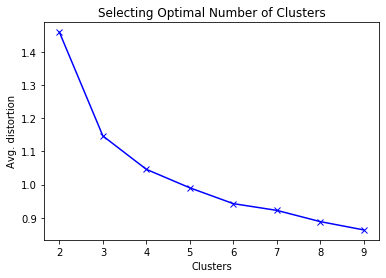

In [24]:
avgDistortion     = []
silhouette_scores = [] 

clusterRange = range(2,10)
for k in clusterRange:
    kMeanCluster = KMeans(n_clusters = k, random_state=11)
    kMeanCluster.fit(custDfSCaled)   
    cluster_labels = kMeanCluster.predict(custDfSCaled)
    
    # Get the distortion value 
    avgDistortion.append(sum(np.min(cdist(custDfSCaled, kMeanCluster.cluster_centers_, 
                             'euclidean'),axis=1)) / custDfSCaled.shape[0] )
    
    silhouette_avg = silhouette_score(custDfSCaled, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(silhouette_avg)
    
plot.plot(clusterRange,avgDistortion, 'bx-')
plot.xlabel("Clusters")
plot.ylabel("Avg. distortion")
plot.title("Selecting Optimal Number of Clusters")

## Elbow method shows either 3 or 4 can be considered as optimal number of clusters.

## 5.3 Silhouette score for various number of clusters

Text(0, 0.5, 'Silhouette Score')

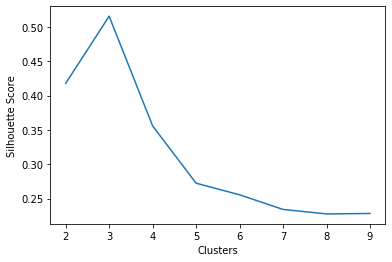

In [25]:
plot.plot(clusterRange,silhouette_scores)
plot.xlabel("Clusters")
plot.ylabel("Silhouette Score")


In [26]:
silhouette_scores = []

## 5.4 Using number of cluster = 3 and analyse the results  

In [27]:
kMeanResDf = custDf_Copy.copy()

# Fit Kmean clustering model with 3 clusters
kMeanCluster = KMeans(n_clusters = 3, random_state=11)
kMeanCluster.fit(custDfSCaled)   

# Predict the results which gives the cluster number for every data (row) and append the cluster index to the dataframe
cluster_labels = kMeanCluster.predict(custDfSCaled)
kMeanResDf['Kmean_Cluster_Count'] = cluster_labels

# Get the silhouette score for the model
silhouette_avg = silhouette_score(custDfSCaled, cluster_labels)

# Keep the score in a list to compare with hierarchical
silhouette_scores.append(('KMeans', silhouette_avg) )
print(silhouette_scores)

# Show the cluster results
kMeanResDf

[('KMeans', 0.5154656016306804)]


,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Kmean_Cluster_Count
9,44770,3000,4,0,1,7,0
329,50412,5000,7,4,2,4,1
46,83326,5000,1,2,2,5,0
317,87485,5000,5,5,0,4,1
312,51552,5000,7,3,1,4,1
...,...,...,...,...,...,...,...
646,58392,186000,7,0,8,1,2
632,97935,187000,7,1,7,0,2
650,78996,195000,10,1,12,2,2
631,14916,195000,8,0,15,0,2


## 5.5 Analyse KMean Clustering Results by groups and boxplots

In [28]:
kMeanClusterGroup = kMeanResDf.groupby(['Kmean_Cluster_Count'])
kMeanClusterGroup.mean()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Kmean_Cluster_Count,,,,,,
0,55128.536036,12180.180180,2.405405,0.936937,3.567568,6.851351
1,54801.882507,33853.785901,5.519582,3.483029,0.986945,2.010444
2,56708.760000,141040.000000,8.740000,0.600000,10.900000,1.080000


## Box plot analysis

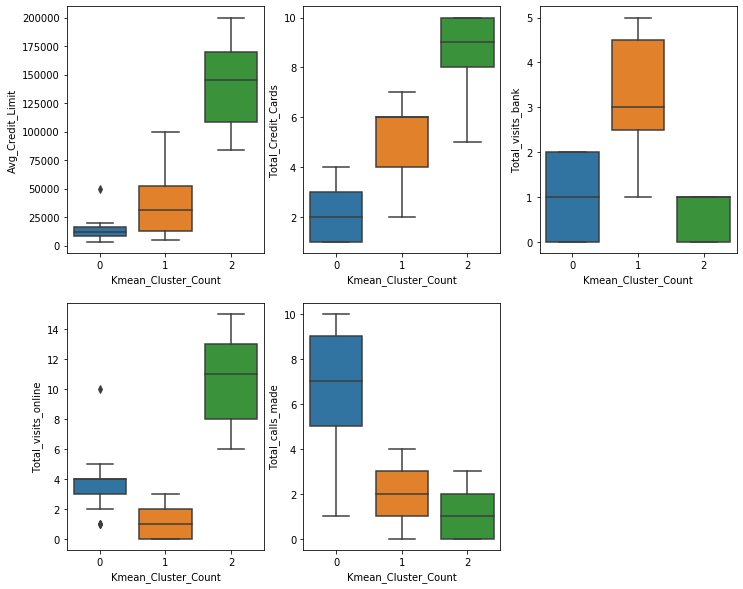

In [29]:
plot.figure(figsize=(12,10))

plot.subplot(2,3,1)
sns.boxplot(kMeanResDf.Kmean_Cluster_Count,custDf_Copy.Avg_Credit_Limit)

plot.subplot(2,3,2)
sns.boxplot(kMeanResDf.Kmean_Cluster_Count,custDf_Copy.Total_Credit_Cards)

plot.subplot(2,3,3)
sns.boxplot(kMeanResDf.Kmean_Cluster_Count,custDf_Copy.Total_visits_bank)

plot.subplot(2,3,4)
sns.boxplot(kMeanResDf.Kmean_Cluster_Count,custDf_Copy.Total_visits_online)

plot.subplot(2,3,5)
sns.boxplot(kMeanResDf.Kmean_Cluster_Count,custDf_Copy.Total_calls_made)


## Pair plot analysis

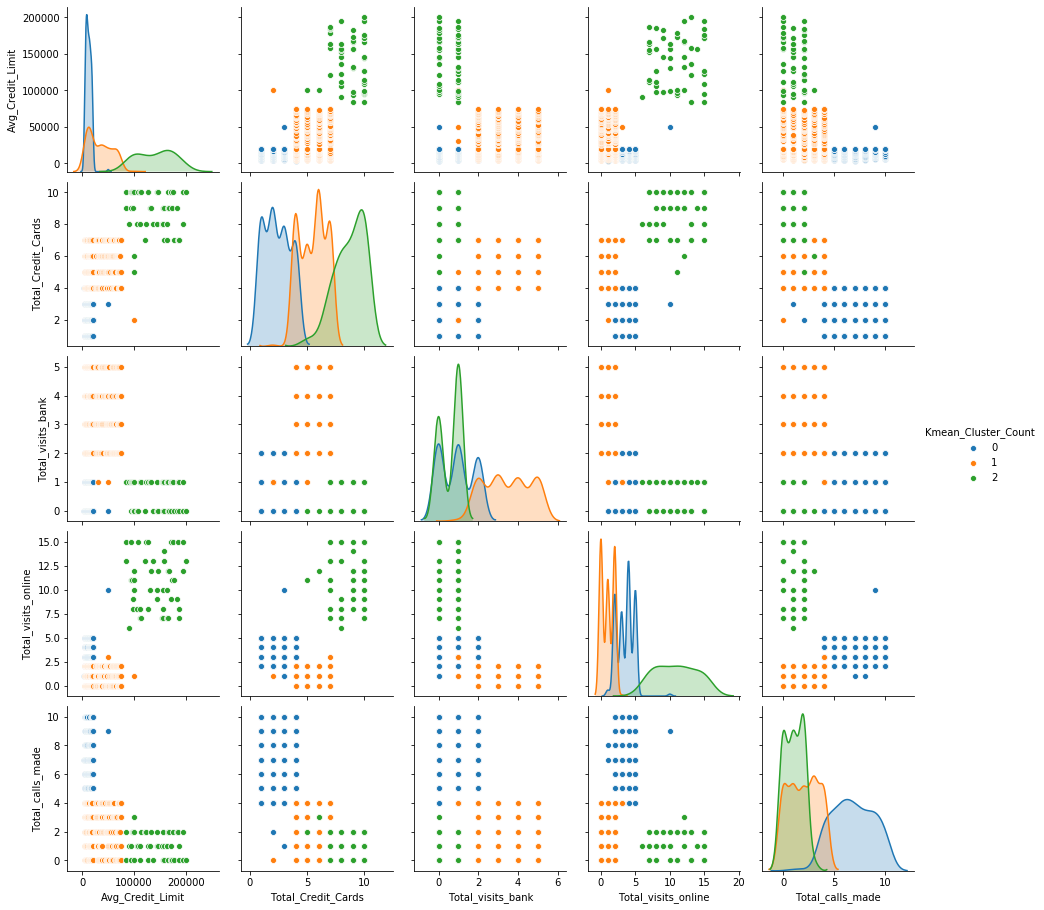

In [30]:
col_list.append('Kmean_Cluster_Count')
sns.pairplot(kMeanResDf[col_list], hue='Kmean_Cluster_Count')

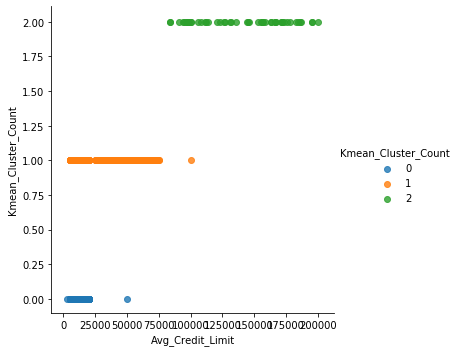

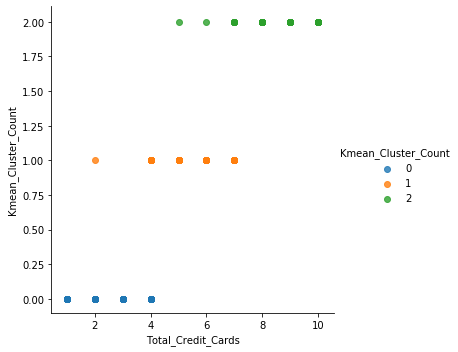

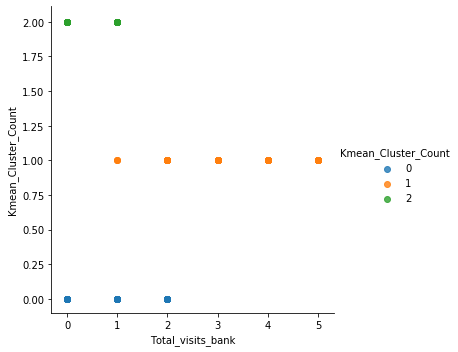

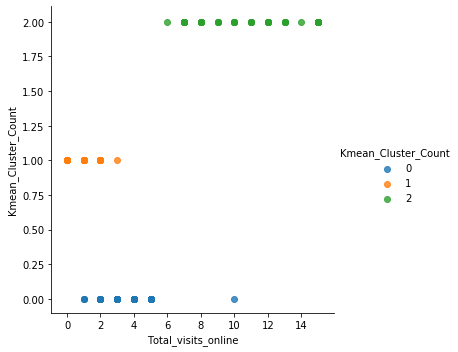

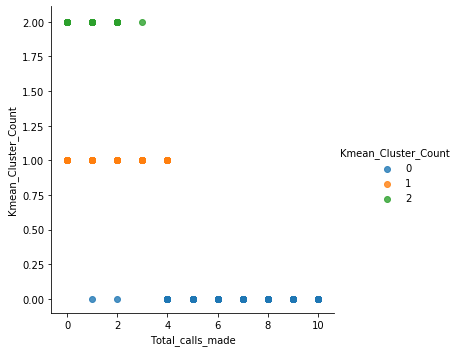

In [31]:
sns.lmplot(x="Avg_Credit_Limit", y="Kmean_Cluster_Count", data=kMeanResDf, fit_reg=False, hue="Kmean_Cluster_Count")
plot.show()


sns.lmplot(x="Total_Credit_Cards", y="Kmean_Cluster_Count", data=kMeanResDf, fit_reg=False, hue="Kmean_Cluster_Count")
plot.show()


sns.lmplot(x="Total_visits_bank", y="Kmean_Cluster_Count", data=kMeanResDf, fit_reg=False, hue="Kmean_Cluster_Count")
plot.show()


sns.lmplot(x="Total_visits_online", y="Kmean_Cluster_Count", data=kMeanResDf, fit_reg=False, hue="Kmean_Cluster_Count")
plot.show()


sns.lmplot(x="Total_calls_made", y="Kmean_Cluster_Count", data=kMeanResDf, fit_reg=False, hue="Kmean_Cluster_Count")
plot.show()

## K Mean Clustering Analysis

### Cluster group 1: 
####                               Has low credit limit, less credit cards and poeple in this group do many calls to resolve their issues.

### Cluster group 2:
####                               Has an average credit limit of around 34000, more credit cards, more visits to the bank than other groups and                                            less calls made. So their perferred way to approach bank is by visiting.

### Cluster group 3:
####                                Has an avreage credit limit of 150000, highest number of credit cards than other 2 groups, higher online visits                                          and least calls made. People in this group perfer online visit to contact the bank


<p style="font-family: Arial; font-size:2.4em;color:red;">  Q4: Execution of Hierarchical Clustering </p>

# 6. Hierarchical Clustering
# -------------------------------------

## 6.1 Trying Hiearchical clustering with various linkage but euclidean method is used to measure distance.

In [32]:
siliuette_score_hierarchical = []

for cluster in range(2,8,1):
    for linkage_method in ['ward', 'average', 'complete']:
        agglomerative = AgglomerativeClustering(linkage=linkage_method, affinity='euclidean',n_clusters=cluster).fit_predict(custDfSCaled)
        sil_score = metrics.silhouette_score(custDfSCaled, agglomerative, metric='euclidean')
        siliuette_score_hierarchical.append((sil_score, linkage_method , len(set(agglomerative)) ) )
        

silhouetteScore_Df = pd.DataFrame(siliuette_score_hierarchical, columns=["Sil_Score", "Linkage", "Clusters"])
silhouetteScore_Df

,Sil_Score,Linkage,Clusters
0,0.416995,ward,2
1,0.569686,average,2
2,0.569686,complete,2
3,0.514500,ward,3
4,0.515675,average,3
5,0.502320,complete,3
6,0.348912,ward,4
7,0.474495,average,4
8,0.340204,complete,4
9,0.259061,ward,5


## 6.2 Comparing Silhouette Score of various linkage methods

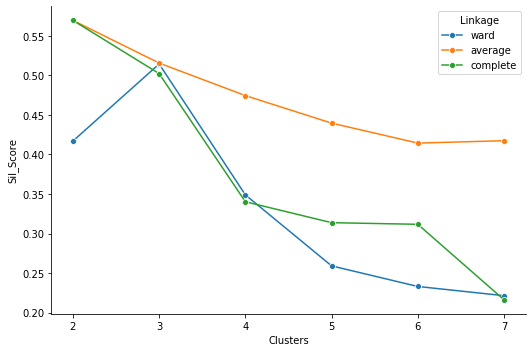

In [33]:
g = sns.FacetGrid(hue='Linkage',data=silhouetteScore_Df,legend_out=False,height =5, aspect=1.5)
g.map(sns.lineplot,"Clusters",'Sil_Score',marker='o')
g.add_legend()

### From the above plot,
#### 1. We can see that the silhouette score is high for when cluster = 3. 
#### 2. The average linkage method is giving good results across all the clusters.
#### 3. So we choose number of cluster as 3 and linkage method as average for further analysis.

## 6.3  Picking the optimal cluster count using silhouette score and analysing its cophenetic score and dendrogram

In [34]:
def DrawDendrogram(Z, method, cophenScore):
    plot.figure(figsize=(20,8))
    plot.title("Agglomerative Clustering Dendrogram" + " - Linkage = " + method + " - Cophentic Score = " + str(cophenScore) )
    plot.xlabel("Customer")
    plot.ylabel("Distance")
    dendrogram(Z, leaf_font_size=6, p=3, truncate_mode='lastp')
    plot.tight_layout()
    plot.show()

In [35]:
def boxPlot(df,col, title):
    
    plot.figure(figsize=(12,10))
    
    
    plot.subplot(2,3,1)
    sns.boxplot(df[col],df.Avg_Credit_Limit)

    plot.subplot(2,3,2)
    sns.boxplot(df[col],df.Total_Credit_Cards)

    plot.subplot(2,3,3)
    sns.boxplot(df[col],df.Total_visits_bank)

    plot.subplot(2,3,4)
    sns.boxplot(df[col],df.Total_visits_online)

    plot.subplot(2,3,5)
    sns.boxplot(df[col],df.Total_calls_made)
    plot.title(title)


In [36]:
optimNumCluster = 3

def DoAgglomerativeClustering(linkageMethod,scores):
    aggModel  = AgglomerativeClustering(n_clusters=optimNumCluster,linkage=linkageMethod, affinity='euclidean').fit_predict(custDfSCaled)
    silScore  = metrics.silhouette_score(custDfSCaled, aggModel, metric='euclidean')
    
    # Get Cophenetic Score
    Z = linkage(custDfSCaled, metric = 'euclidean', method=linkageMethod)
    c, coph_dist = cophenet(Z, pdist(custDfSCaled))
    scores.append((linkageMethod,silScore,c) )
    return Z, c, aggModel, scores;

### Hierarchical with Ward linkage

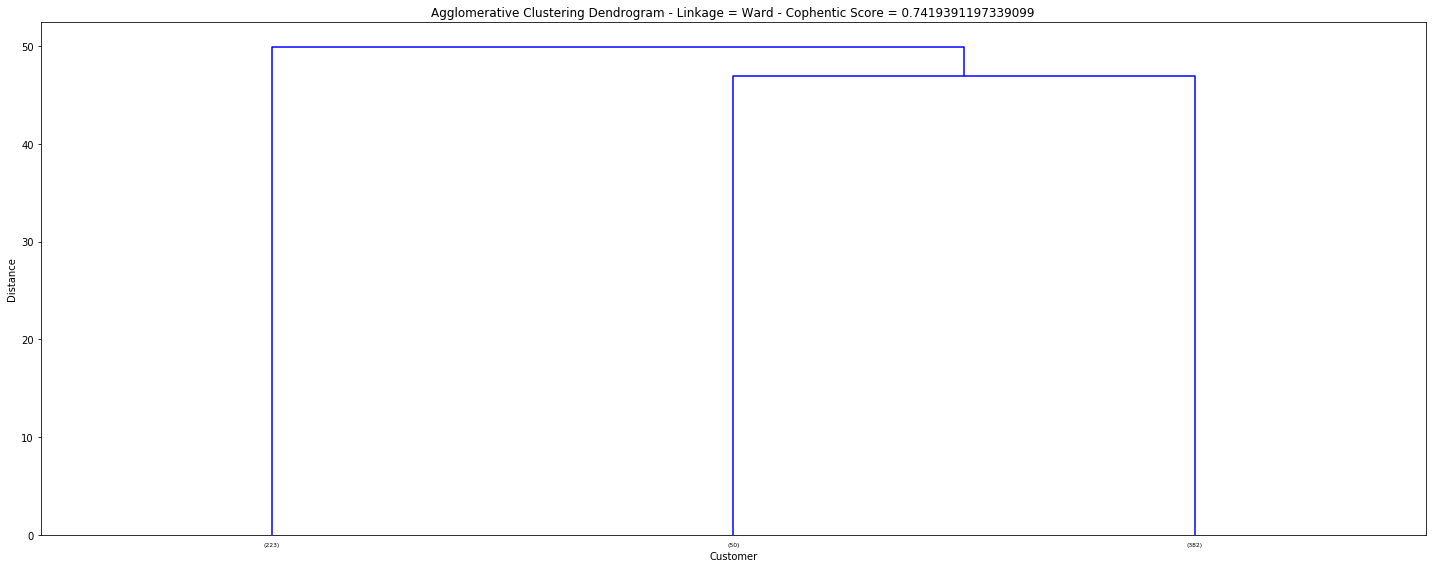

In [37]:
# Ward Linkage
hierarchical_Scores = []
wardZ, wardC, wardClusters, wardScore = DoAgglomerativeClustering('ward',hierarchical_Scores)

# Draw the dendrogram for ward method
DrawDendrogram(wardZ,'Ward',wardC)

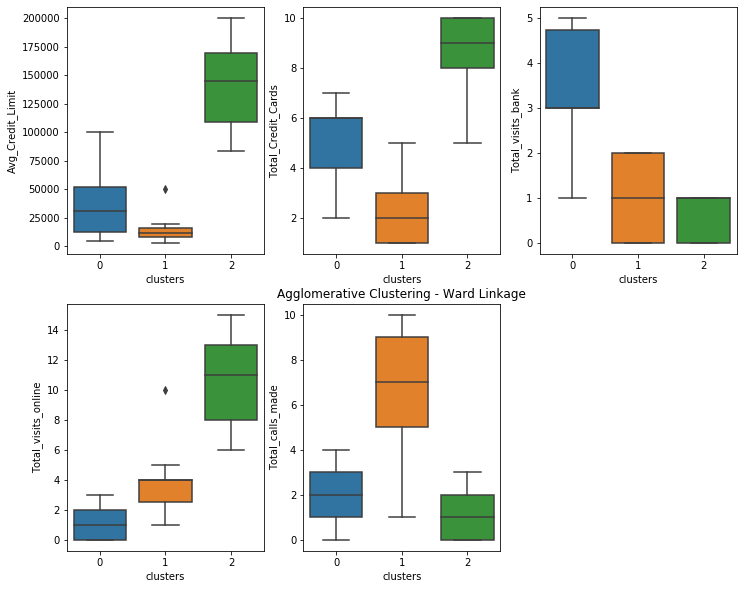

In [38]:
# Box plot for Ward method
wardCustDf             = custDf_Copy.copy()
wardCustDf['clusters'] = wardClusters
boxPlot(wardCustDf,'clusters',"Agglomerative Clustering - Ward Linkage")

### Hierarchical with Average linkage

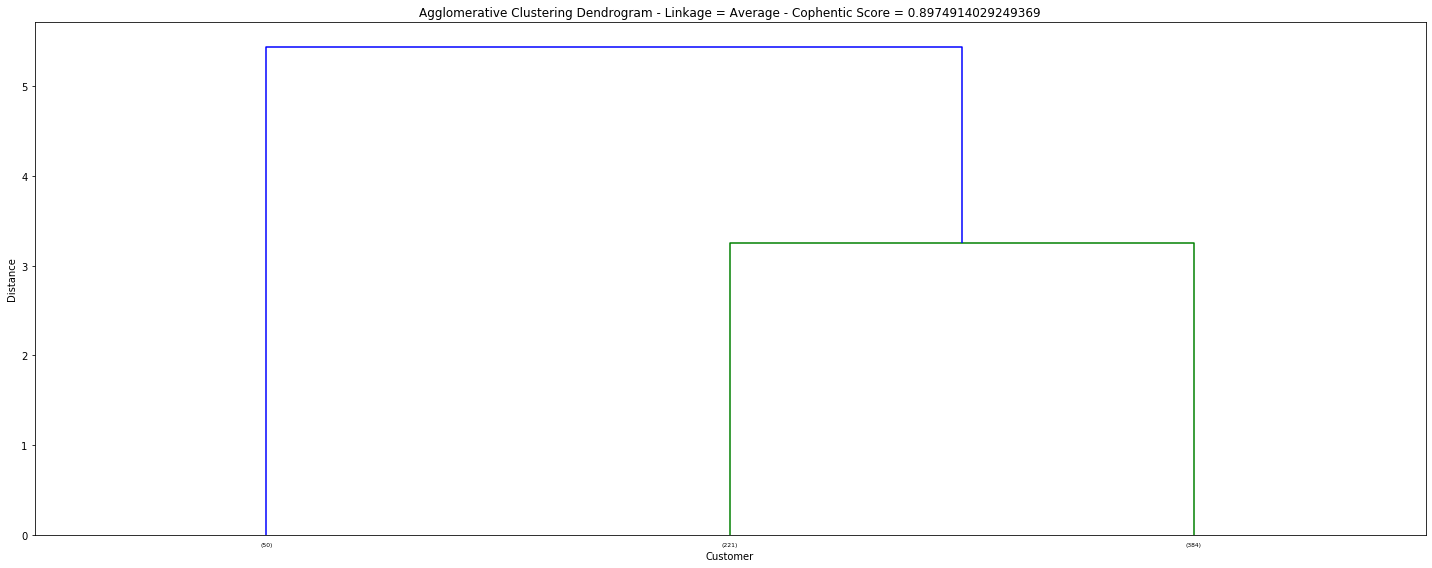

In [39]:
# Average Linkage
avgZ, avgC, avgClusters, avgScore = DoAgglomerativeClustering('average',hierarchical_Scores)

# Draw the dendrogram for ward method
DrawDendrogram(avgZ,'Average',avgC)

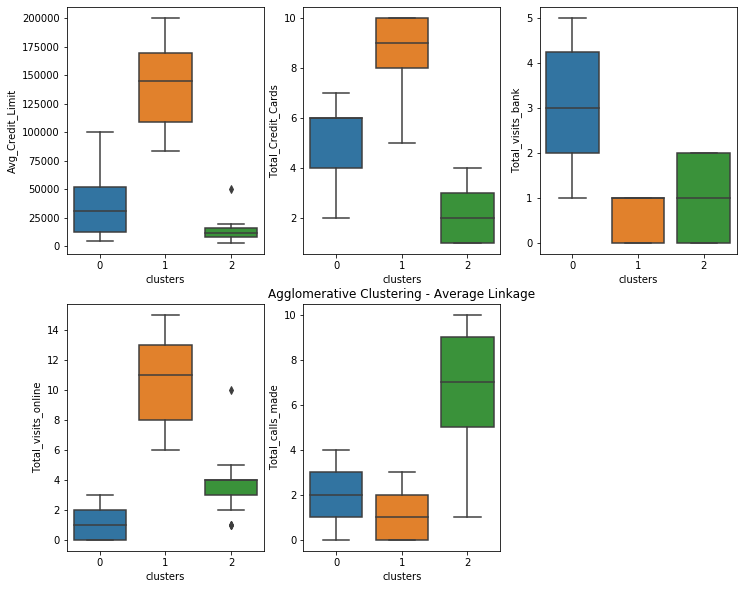

In [40]:
# Box plot for Average method
avgCustDf             = custDf_Copy.copy()
avgCustDf['clusters'] = avgClusters
boxPlot(avgCustDf,'clusters',"Agglomerative Clustering - Average Linkage")

### Hierarchical with Complete linkage

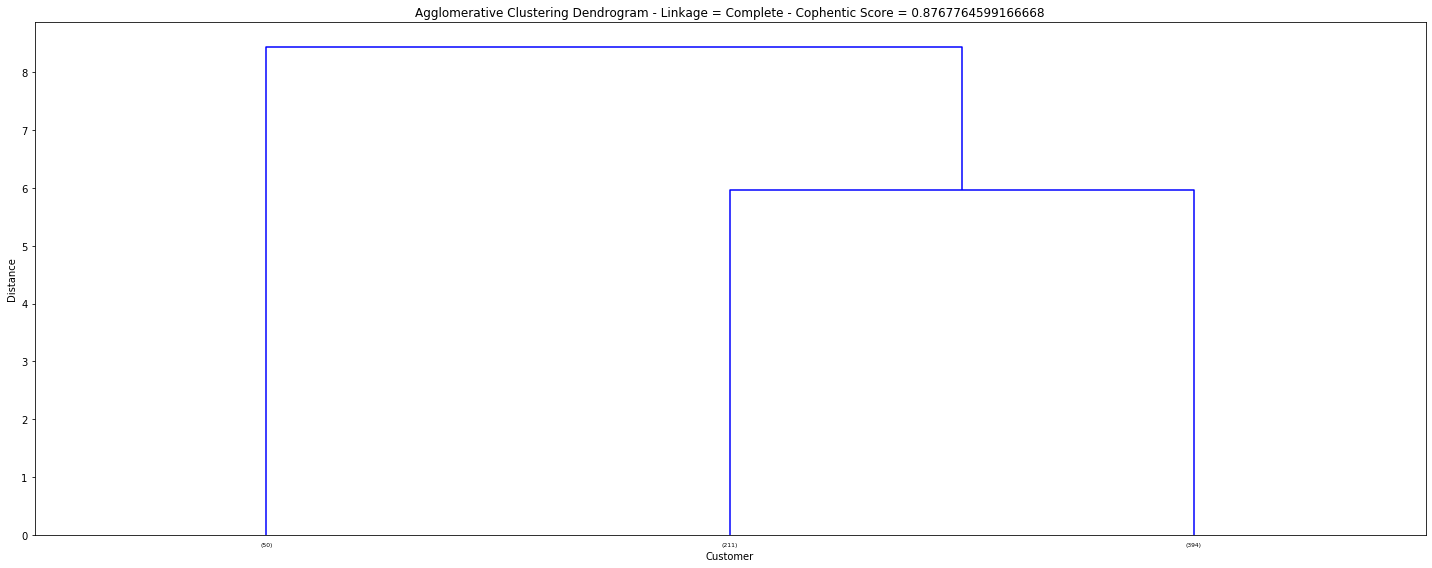

In [41]:
# complete Linkage
compZ, compC, compClusters, compScore = DoAgglomerativeClustering('complete',hierarchical_Scores)

# Draw the dendrogram for ward method
DrawDendrogram(compZ,'Complete',compC)

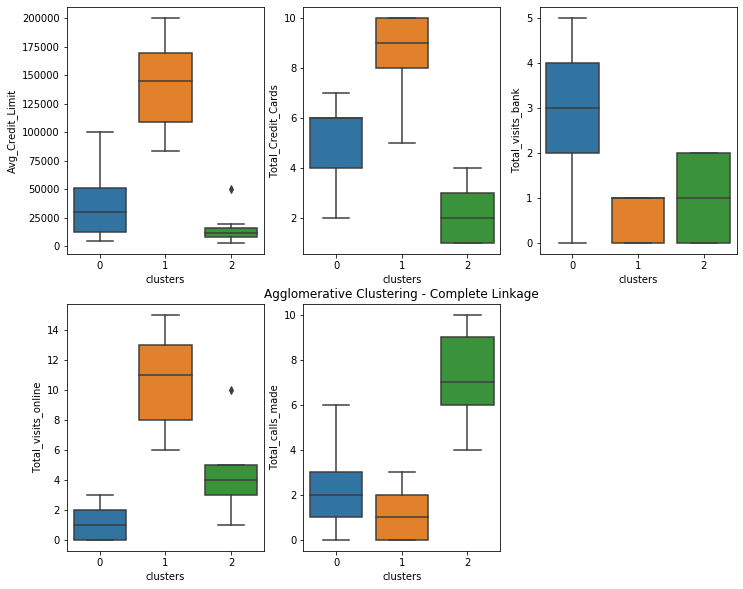

In [42]:
compCustDf             = custDf_Copy.copy()
compCustDf['clusters'] = compClusters
boxPlot(compCustDf,'clusters',"Agglomerative Clustering - Complete Linkage")

### Compare results of various linkage for hierarchical clustering

In [43]:
hierarchicalScore_Df = pd.DataFrame(hierarchical_Scores, columns=["Linkage", "Sil.Score", "Cophenetic Score"])
hierarchicalScore_Df

,Linkage,Sil.Score,Cophenetic Score
0,ward,0.514500,0.741939
1,average,0.515675,0.897491
2,complete,0.502320,0.876776


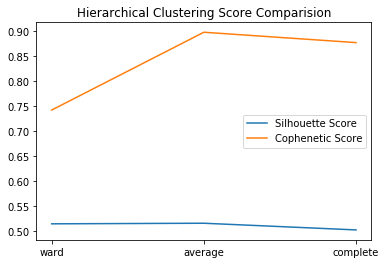

In [44]:
fig, ax = plot.subplots()
ax.plot(hierarchicalScore_Df.Linkage, hierarchicalScore_Df['Sil.Score'], label="Silhouette Score")
ax.plot(hierarchicalScore_Df.Linkage, hierarchicalScore_Df['Cophenetic Score'], label="Cophenetic Score")
ax.legend()
plot.title("Hierarchical Clustering Score Comparision")
plot.show()

<p style="font-family: Arial; font-size:2.4em;color:red;">  Q5: Comparing Silhouette Scores of KMeans and Hierarchical </p>

## Silhouette score for KMean with 3 cluster is 0.5154 and for hierarchical with average linkage is 0.5156. They are performing almost equally.



<p style="font-family: Arial; font-size:2.4em;color:red;">  Q6: K Mean Cluster and Hierarchical clusters </p>

## The number of cluster is same as we have used the optimal cluster count what we got from KMeans in hierarchical.
## The segment also looks very similar only the group numbers are different  (refer the following figure) i.e,
##  Segment number 1 of Kmeans is manifested as segment 3 in hierachical
##  Segment number 2 of Kmeans is manifested as segment 1 in hierachical
##  Segment number 3 of Kmeans is manifested as segment 2 in hierachical

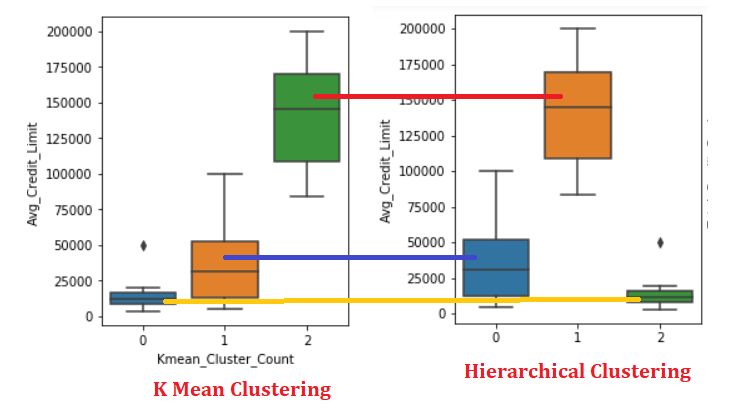

<p style="font-family: Arial; font-size:2.4em;color:red;">  Q7:  Cluster Analysis </p>

### Cluster group 1:
####                               Has low credit limit, less credit cards and poeple in this group do many calls to resolve their issues.
### Cluster group 2:
####                               Has an average credit limit of around 34000, more credit cards, more visits to the bank than other groups and                                            less calls made. So their perferred way to approach bank is by visiting.
### Cluster group 3:
####                               Has an avreage credit limit of 150000, highest number of credit cards than other 2 groups, higher online visits                                          and least calls made. People in this group perfer online visit to contact the bank

<p style="font-family: Arial; font-size:2.4em;color:violet;">  Key Questions </p>

##  There are basically 3 groups of customers.

##  Each segment is different from each other in terms of their credit limit (high, average and low credit limit) and mode of communicating the bank.

##  The segment with moderate credit limit prefers visiting bank. So bank can take some steps to make them use online and calls rather than visiting bank.

##   The segment of people with high credit limit and more credit cards. They spend a lot and get profit to the bank.But bank can have better measure to make sure that they are not defaulting as their credit limit is very high.

## There is another segment with less credit card limit. Bank has to encourage them to use the credit card more to have better usage and increase their credit limit. 
## They have less number of credit cards as well. Bank can target them and give some promotions to sell new credit cards to them.
